# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 10 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [143]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> с занятия по нейронным сетям.

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = w_{21}u_1(x) + w_{22}u_2(x) + b_2,$$

$$u_1(x) = \sigma\big(w_{11}x + b_{11}\big),$$

$$u_2(x) = \sigma\big(w_{12}x + b_{12}\big).$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке минимизируя MSE
$$\text{MSE} = \sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; выписать производные по всем параметрам сети для использования градиентного спуска. Конечно, в данном случае довольно просто выписать все производные напрямую. Мы будем выписывать их поэтапно, так вам будет проще понять общую процедуру в дальнейшем.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = ...$$

Теперь мы можем взять производные выходов сети по весам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{21}} = ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{22}} = ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = ...$$

Наконец, выпишем производные MSE по весам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа.

$$\frac{\partial\:\text{MSE}}{\partial w_{21}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{...} \frac{\partial ...}{\partial w_{21}} = ... $$

$$\frac{\partial\:\text{MSE}}{\partial w_{22}} = \sum_{i=1}^n \frac{\partial \:\text{MSE}}{...} \frac{\partial ...}{\partial w_{22}} = ... $$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{...} \frac{\partial ...}{\partial b_2} = ... $$

**2.2.** Теперь будем разбираться с производным по параметрам первого слоя. Начнем с производной выхода сети по выходу певрого слоя.

$$\frac{\partial \widehat{y}(X_i)}{\partial u_1(X_i)} = ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial u_2(X_i)} = ...$$

Далее нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = ...$$

Теперь мы можем взять производные выходов первого слоя по его параметрам

$$\frac{\partial u_1(X_i)}{\partial w_{11}} = ...$$

$$\frac{\partial u_1(X_i)}{\partial b_{11}} = ...$$

$$\frac{\partial u_2(X_i)}{\partial w_{12}} = ...$$

$$\frac{\partial u_2(X_i)}{\partial b_{12}} = ...$$

Наконец, выпишем производные MSE по весам первого слоя. Аналогично, запишите правило производной сложной функции и выпишите итоговый ответ.

$$\frac{\partial\:\text{MSE}}{\partial w_{11}} = ...$$

$$\frac{\partial\:\text{MSE}}{\partial b_{11}} = ...$$

$$\frac{\partial\:\text{MSE}}{\partial w_{12}} = ...$$

$$\frac{\partial\:\text{MSE}}{\partial b_{12}} = ...$$

Вы могли заметить, мы считали производные начиная с последнего слоя и постепенно доходили до первого. Подобная процедура называется *методом обратного распространения ошибки* (backpropagation), ее преимуществом является эффективное вычисление градиентов.

**3.** Выпишите формулу градиентного спуска по одному из параметров.

...

Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

---
### Задача 2.

Реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. шаблон класса задачи 4 из <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task6.html#Задача-4." target="_blank">задания 6</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [237]:
def func(x):
    return (1 / (1 + np.exp(-x)))

class NeuralNetwork:

    def calculate_y(self, x):
        func = lambda x: self.f(x)
        return (sum(func(self.W1 * x + self.b1) * self.W2) + self.b2)[0]
    
    def count_gradient(self):
        res = []
        calc_function = lambda x, y : (2 * (-y + self.calculate_y(x)) * self.W2[0] *\
                                        np.exp(-(self.W1[0] * x + self.b1[0])) /\
                                         (1 + np.exp(-(self.W1[0] * x + self.b1[0])))**2 * x)
        res.append(np.mean([calc_function(self.X_batch[i], self.Y_batch[i]) for i in range(len(self.X_batch))]))
        
        calc_function2 = lambda x, y : (2 * (-y + self.calculate_y(x)) * self.W2[1] *\
                                        np.exp(-(self.W1[1] * x + self.b1[1])) /\
                                         (1 + np.exp(-(self.W1[1] * x + self.b1[1])))**2 * x)
        res.append(np.mean([calc_function2(self.X_batch[i], self.Y_batch[i]) for i in range(len(self.X_batch))]))
        
        calc_function3 = lambda x, y : (2 * (-y + self.calculate_y(x)) * func(self.W1[0] * x + self.b1[0]))
        res.append(np.mean([calc_function3(self.X_batch[i], self.Y_batch[i]) for i in range(len(self.X_batch))]))
        
        calc_function4 = lambda x, y : (2 * (-y + self.calculate_y(x)) * func(self.W1[1] * x + self.b1[1]))
        res.append(np.mean([calc_function4(self.X_batch[i], self.Y_batch[i]) for i in range(len(self.X_batch))]))
                                          
        calc_function5 = lambda x, y : (2 * (-y + self.calculate_y(x)) * self.W2[0] *\
                                        np.exp(-(self.W1[0] * x + self.b1[0])) /\
                                         (1 + np.exp(-(self.W1[0] * x + self.b1[0])))**2)
        res.append(np.mean([calc_function5(self.X_batch[i], self.Y_batch[i]) for i in range(len(self.X_batch))]))
        
        calc_function6 = lambda x, y : (2 * (-y + self.calculate_y(x)) * self.W2[1] *\
                                        np.exp(-(self.W1[1] * x + self.b1[1])) /\
                                         (1 + np.exp(-(self.W1[1] * x + self.b1[1])))**2)
        res.append(np.mean([calc_function6(self.X_batch[i], self.Y_batch[i]) for i in range(len(self.X_batch))]))
        
        calc_function7 = lambda x, y : (2 * (-y + self.calculate_y(x)))
        res.append(np.mean([calc_function7(self.X_batch[i], self.Y_batch[i]) for i in range(len(self.X_batch))]))

                     
        return np.array(res)
    
    def calculate_coef(self):
        lambd = 0.1
        prev_theta = np.concatenate((self.W1, self.W2, self.b1, self.b2), axis=None)
        for i in range(1000):
            gradient = self.count_gradient()
            prev_theta2 = prev_theta
            prev_theta = prev_theta - lambd * gradient
            self.W1[0] = prev_theta[0]
            self.W1[1] = prev_theta[1]
            self.W2[0] = prev_theta[2]
            self.W2[1] = prev_theta[3]
            self.b1[0] = prev_theta[4]
            self.b1[1] = prev_theta[5]
            self.b2[0] = prev_theta[6]
            if (sum(abs(prev_theta2 - prev_theta)) < 0.05):
                break

    
    def __init__(self, f=func):
        self.batch_size = 1000
        self.f = f
        self.W1 = np.array([10.3, 2.1])
        self.b1 = np.array([12.0, 4.0])
        self.W2 = np.array([8.0, 12.0])
        self.b2 = np.array([0.0])
        return
    
    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y)
        elems = 0
        if (len(X) > self.batch_size):
            elems = np.random.randint(self.batch_size, size=len(X))
        else:
            elems = np.arange(len(X))
        self.X_batch = X[elems]
        self.Y_batch = Y[elems]
        self.calculate_coef()
        return
        
    def predict(self, X):
        return np.array([self.calculate_y(x) for x in X])

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [238]:
sample_size = int(1e5)
X = sps.norm.rvs(size=(sample_size, 1))
y = X ** 2 + 1

Обучите нейронную сеть на этих данных, а также простую линейную регрессию.

In [239]:
net = NeuralNetwork()
net.fit(X, y)

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

MSE нейронной сети:  1.712836050811703
MSE линейной регрессии:  2.0214249730002183


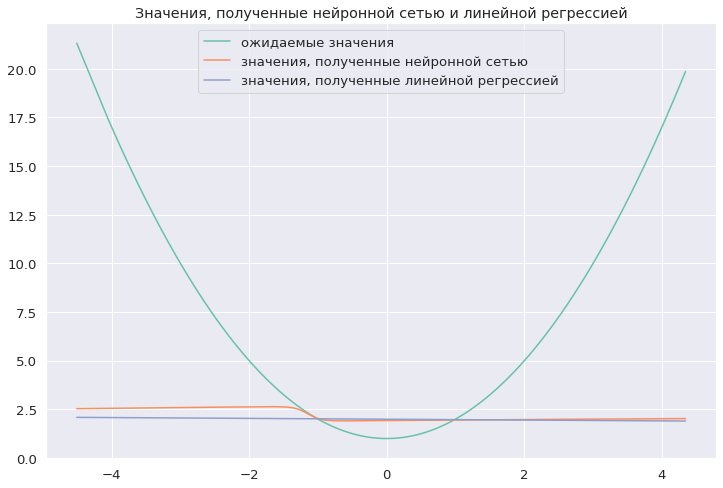

In [244]:
plt.figure(figsize=(12,8))
plt.title('Значения, полученные нейронной сетью и линейной регрессией')
X.shape = (len(X),)
y.shape = (len(y),)
model = LinearRegression(fit_intercept=True)
model.fit(X.reshape(-1, 1), y)

X_test = sps.norm.rvs(size=(sample_size, 1))
y_test = X_test ** 2 + 1
pred = net.predict(X_test)
pred2 = model.predict(X_test.reshape(-1, 1))
X_test.shape = (len(X),)
y_test.shape = (len(y),)
sns.lineplot(x=X_test, y=y_test, label="ожидаемые значения")
sns.lineplot(x=X_test, y=pred, label="значения, полученные нейронной сетью")
sns.lineplot(x=X_test, y=pred2, label="значения, полученные линейной регрессией")
print("MSE нейронной сети: ", mean_squared_error(y_test, pred))
print("MSE линейной регрессии: ",mean_squared_error(y_test, pred2))
plt.show()

Повторите вычисления для другой нелинейной функции $y(x)$.

In [245]:
y = np.log(abs(X)) * X
new_net = NeuralNetwork()
new_net.fit(X, y)

MSE нейронной сети:  0.2659469903110595
MSE линейной регрессии:  0.23413280540149387


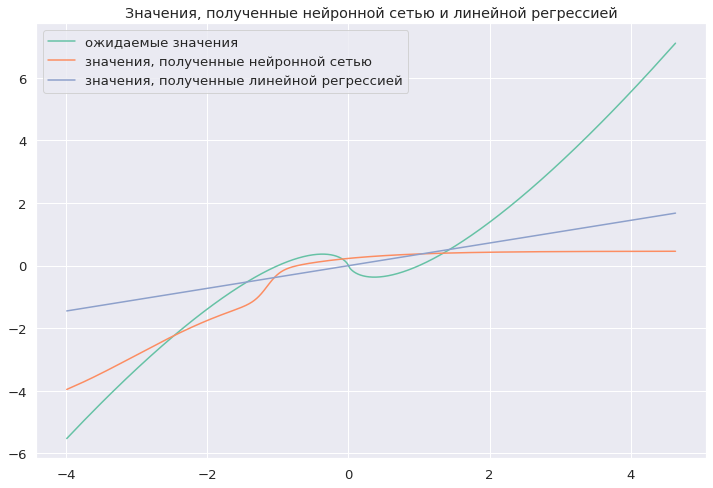

In [252]:
plt.figure(figsize=(12,8))
plt.title('Значения, полученные нейронной сетью и линейной регрессией')
X.shape = (len(X),)
y.shape = (len(y),)
model2 = LinearRegression(fit_intercept=True)
model2.fit(X.reshape(-1, 1), y)

X_test = sps.norm.rvs(size=(sample_size, 1))
y_test = np.log(abs(X_test)) * X_test
pred = new_net.predict(X_test)
pred2 = model2.predict(X_test.reshape(-1, 1))
X_test.shape = (len(X),)
y_test.shape = (len(y),)
sns.lineplot(x=X_test, y=y_test, label="ожидаемые значения")
sns.lineplot(x=X_test, y=pred, label="значения, полученные нейронной сетью")
sns.lineplot(x=X_test, y=pred2, label="значения, полученные линейной регрессией")
print("MSE нейронной сети: ", mean_squared_error(y_test, pred))
print("MSE линейной регрессии: ",mean_squared_error(y_test, pred2))
plt.show()

Выоды:
Полученная нейронная сеть приблежает функцию линейной комбинацией из функций активаций. Графики функций 1 / (1 + e**(-x)) растягиваются и сдвигаются, для лучшего совпадаения на тренировочных данных. Парабола была "предсказана" лучше, чем с помощью линейной регрессии, это заметно в районе x = -1.
Функция x * (log(abs(x)) предсказана хуже, чем с помощью линейной регрессии, однако наибольшие отклонения видны в точках с большими координатами x, где точек, в силу того, что x брались по нормальному распределению, меньше. 

---
### Задача 3.

Теперь напишите рассмотренную ранее нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

Обучите нейросеть на рассмотренных ранее данных. Используйте код с занятия.